Імпортуємо модулі

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering

Считуємо csv file

In [80]:
data = pd.read_csv("/Users/yurab/Desktop/Python for university/MMTAD/Lab2/digital_marketing_campaign_dataset.csv", sep=',')
data_clean = data.dropna()
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [81]:
#print(data_clean)
count = data_clean.shape[0]
print(data_clean.head(count))

      CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              

Метод к-середніх (евклідова метрика)

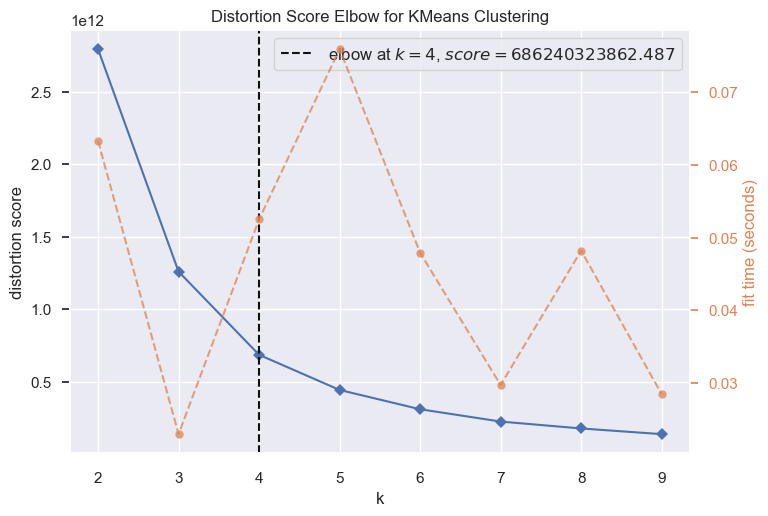

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))
z = data_clean[["Age", "Income"]]
visualizer.fit(z)        
visualizer.show()

Малюємо кластери різними кольорами та таблицю з центрами кластерів

[[4.35792008e+01 3.62176976e+04]
 [4.36139833e+01 1.03409185e+05]
 [4.39475959e+01 1.34469776e+05]
 [4.33919647e+01 7.01429721e+04]]


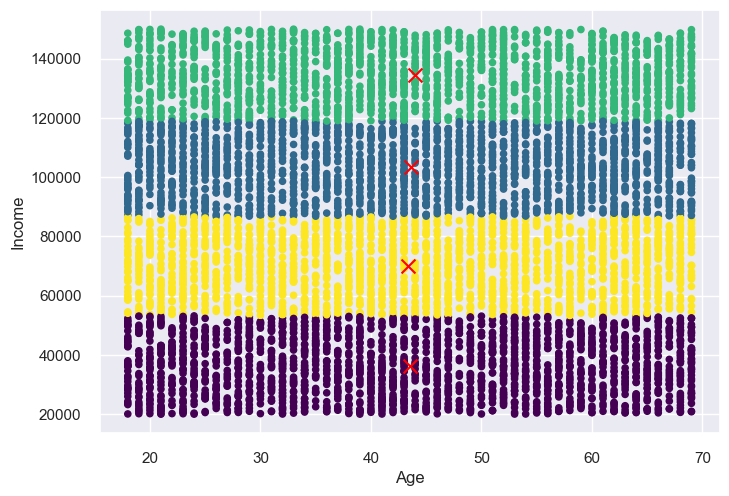

In [51]:
kmeans0 = KMeans(n_clusters=4, random_state=0)
kmeans0.fit(z)
center_cluster = kmeans0.cluster_centers_
print(center_cluster)

plt.scatter(z["Age"], z["Income"], c=kmeans0.labels_, s=20, cmap="viridis")

plt.scatter(center_cluster[:, 0], center_cluster[:, 1], c='red', s=100, marker='x')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [64]:
labels, counts = np.unique(kmeans0.labels_, return_counts=True)
for i, center in enumerate(center_cluster):
    print(f"Кластер {i + 1}:")
    print(f"Центр: {center}")
    print(f"Кількість елементів: {counts[i]}")
    print()

table = pd.DataFrame(data = center_cluster, columns=["Age Center", "Income Center"])
table.insert(1,'count',[2076,2033,1861,2030])
table.rename(columns={0:'centers'})

Кластер 1:
Центр: [   43.57920077 36217.69764083]
Кількість елементів: 2076

Кластер 2:
Центр: [4.36139833e+01 1.03409185e+05]
Кількість елементів: 2033

Кластер 3:
Центр: [4.39475959e+01 1.34469776e+05]
Кількість елементів: 1861

Кластер 4:
Центр: [4.33919647e+01 7.01429721e+04]
Кількість елементів: 2030



,Age Center,count,Income Center
0,43.579201,2076,36217.697641
1,43.613983,2033,103409.185130
2,43.947596,1861,134469.775797
3,43.391965,2030,70142.972073


Ієрархічний метод

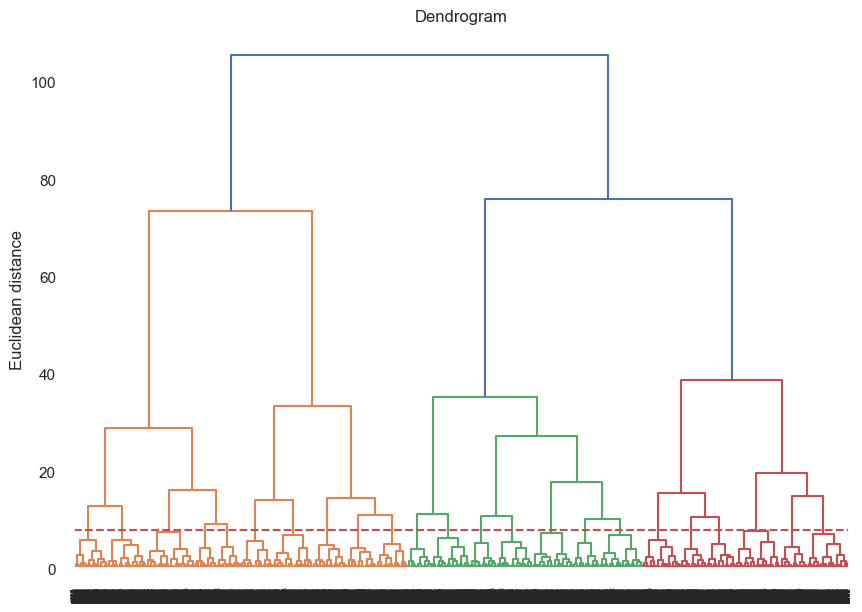

In [76]:
l = data_clean[["Age", "Income"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(l)
z = linkage(x_scaled, method = 'ward')
plt.figure(figsize = (10,7))
dendrogram(z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.axhline(y=8, color="r", linestyle="--")
plt.show()

In [78]:
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels = clustering.fit_predict(l)
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_table = pd.DataFrame({"Cluster": unique_labels, "Cluster size": counts})
print(cluster_table)

   Cluster  Cluster size
0        0          2399
1        1          1975
2        2          1885
3        3          1741
